In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("miningproject.csv")
df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,4e3642dfbe71253594fa4634463c93f3cdf7c395818e03...,2023-03,City of London Police,City of London Police,-0.106345,51.520463,On or near,E01000916,Camden 027B,Drugs,Offender given a drugs possession warning
1,fd52093cfd372bfcb823d0b6135a06222da96bdbacf34f...,2023-03,City of London Police,City of London Police,-0.096718,51.515511,On or near,E01000001,City of London 001A,Drugs,Under investigation
2,2c72824ee749380d1d03b7daecdd4adbe0b555d429a2f8...,2023-03,City of London Police,City of London Police,-0.097078,51.519045,On or near A1,E01000001,City of London 001A,Drugs,Awaiting court outcome
3,429963166c1f583fbbfdc155bb23c916eac0e33868c63a...,2023-03,City of London Police,City of London Police,-0.078783,51.515383,On or near Houndsditch,E01000005,City of London 001E,Drugs,Under investigation
4,511a0a8a2cc77fbf37a732bcf8beaaa1dcebd0e0d01f07...,2023-03,City of London Police,City of London Police,-0.074330,51.513647,On or near Little Somerset Street,E01000005,City of London 001E,Drugs,Under investigation
5,b81a20ef99fad431b0e93bac2417043059bdd176d7c74f...,2023-03,City of London Police,City of London Police,-0.075453,51.511965,On or near Minories,E01000005,City of London 001E,Drugs,Under investigation
6,3757e5cb46c5198d75228a8995065f67447dcd3f3303b2...,2023-03,City of London Police,City of London Police,-0.073717,51.510084,On or near Shorter Street,E01000005,City of London 001E,Drugs,Under investigation
7,1e482eceda5a24cd441fd9d1f579862f46d960b9975dd4...,2023-03,City of London Police,City of London Police,-0.075401,51.511164,On or near,E01000005,City of London 001E,Drugs,Under investigation
8,e44e0ea6cc58da47443883768987419fb52afabf9b8699...,2023-03,City of London Police,City of London Police,-0.078783,51.515383,On or near Houndsditch,E01000005,City of London 001E,Drugs,Under investigation
9,72b4712ddbd9b8972cfe877a5a10879e6611307e5ac868...,2023-03,City of London Police,City of London Police,-0.079907,51.517785,On or near Victoria Avenue,E01032739,City of London 001F,Drugs,Under investigation


Text(0, 0.5, 'Longitude')

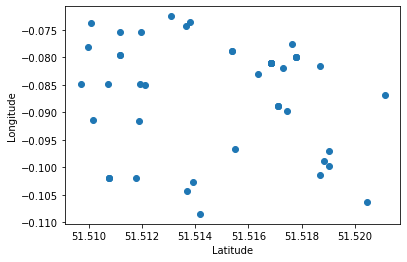

In [5]:
plt.scatter(df.Latitude,df['Longitude'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Preprocessing using min max scaler

In [6]:
scaler = MinMaxScaler()

scaler.fit(df[['Latitude']])
df['Latitude'] = scaler.transform(df[['Latitude']])

scaler.fit(df[['Longitude']])
df['Longitude'] = scaler.transform(df[['Longitude']])

# Apllying Elbow method 

In [7]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Longitude','Latitude']])
    sse.append(km.inertia_)
    

C:\Users\kirollos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


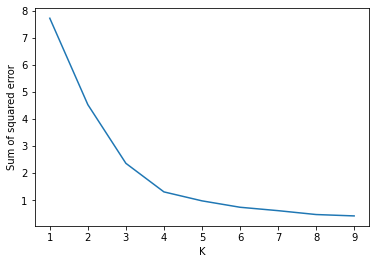

In [8]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# Applying Clustering Algorithm with K = 4

In [9]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['Latitude','Longitude']])
y_predicted

array([3, 2, 3, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1,
       0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 3, 2,
       3, 3, 2, 1, 0, 0])

In [10]:
df['cluster'] = y_predicted
df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,cluster
0,4e3642dfbe71253594fa4634463c93f3cdf7c395818e03...,2023-03,City of London Police,City of London Police,0.058622,0.941892,On or near,E01000916,Camden 027B,Drugs,Offender given a drugs possession warning,3
1,fd52093cfd372bfcb823d0b6135a06222da96bdbacf34f...,2023-03,City of London Police,City of London Police,0.326724,0.508532,On or near,E01000001,City of London 001A,Drugs,Under investigation,2
2,2c72824ee749380d1d03b7daecdd4adbe0b555d429a2f8...,2023-03,City of London Police,City of London Police,0.316698,0.817800,On or near A1,E01000001,City of London 001A,Drugs,Awaiting court outcome,3
3,429963166c1f583fbbfdc155bb23c916eac0e33868c63a...,2023-03,City of London Police,City of London Police,0.826195,0.497331,On or near Houndsditch,E01000005,City of London 001E,Drugs,Under investigation,1
4,511a0a8a2cc77fbf37a732bcf8beaaa1dcebd0e0d01f07...,2023-03,City of London Police,City of London Police,0.950206,0.345410,On or near Little Somerset Street,E01000005,City of London 001E,Drugs,Under investigation,0
5,b81a20ef99fad431b0e93bac2417043059bdd176d7c74f...,2023-03,City of London Police,City of London Police,0.918932,0.198215,On or near Minories,E01000005,City of London 001E,Drugs,Under investigation,0
6,3757e5cb46c5198d75228a8995065f67447dcd3f3303b2...,2023-03,City of London Police,City of London Police,0.967277,0.033605,On or near Shorter Street,E01000005,City of London 001E,Drugs,Under investigation,0
7,1e482eceda5a24cd441fd9d1f579862f46d960b9975dd4...,2023-03,City of London Police,City of London Police,0.920380,0.128118,On or near,E01000005,City of London 001E,Drugs,Under investigation,0
8,e44e0ea6cc58da47443883768987419fb52afabf9b8699...,2023-03,City of London Police,City of London Police,0.826195,0.497331,On or near Houndsditch,E01000005,City of London 001E,Drugs,Under investigation,1
9,72b4712ddbd9b8972cfe877a5a10879e6611307e5ac868...,2023-03,City of London Police,City of London Police,0.794893,0.707535,On or near Victoria Avenue,E01032739,City of London 001F,Drugs,Under investigation,1


In [11]:
km.cluster_centers_

array([[0.16493326, 0.83153101],
       [0.66225526, 0.72650815],
       [0.23169686, 0.22720564],
       [0.83250197, 0.21605213]])

# Visualizing clusters resulted from K-means

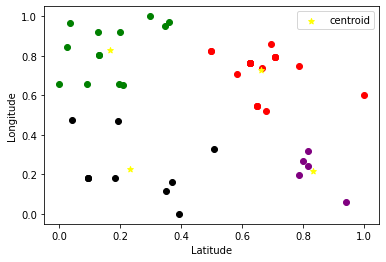

In [12]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.Latitude,df1['Longitude'],color='green')
plt.scatter(df2.Latitude,df2['Longitude'],color='red')
plt.scatter(df3.Latitude,df3['Longitude'],color='black')
plt.scatter(df4.Latitude,df4['Longitude'],color='purple')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='*',label='centroid')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()

# The silhouette measure for K-mean clusters

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['Longitude', 'Latitude']])
silhouette_avg = silhouette_score(df[['Longitude', 'Latitude']], kmeans.labels_)
silhouette_avg

0.5639544852494716

# Applying Clustering Algorithm with K = 5

Note : I made the same issues when k is equalized to 4

In [15]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Latitude','Longitude']])
y_predicted

array([2, 4, 2, 1, 3, 3, 3, 3, 1, 1, 0, 4, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1,
       3, 4, 1, 0, 1, 1, 1, 1, 4, 1, 0, 0, 4, 0, 1, 1, 1, 1, 4, 3, 2, 4,
       2, 2, 4, 1, 3, 3])

In [16]:
df['cluster'] = y_predicted
df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,cluster
0,4e3642dfbe71253594fa4634463c93f3cdf7c395818e03...,2023-03,City of London Police,City of London Police,0.058622,0.941892,On or near,E01000916,Camden 027B,Drugs,Offender given a drugs possession warning,2
1,fd52093cfd372bfcb823d0b6135a06222da96bdbacf34f...,2023-03,City of London Police,City of London Police,0.326724,0.508532,On or near,E01000001,City of London 001A,Drugs,Under investigation,4
2,2c72824ee749380d1d03b7daecdd4adbe0b555d429a2f8...,2023-03,City of London Police,City of London Police,0.316698,0.817800,On or near A1,E01000001,City of London 001A,Drugs,Awaiting court outcome,2
3,429963166c1f583fbbfdc155bb23c916eac0e33868c63a...,2023-03,City of London Police,City of London Police,0.826195,0.497331,On or near Houndsditch,E01000005,City of London 001E,Drugs,Under investigation,1
4,511a0a8a2cc77fbf37a732bcf8beaaa1dcebd0e0d01f07...,2023-03,City of London Police,City of London Police,0.950206,0.345410,On or near Little Somerset Street,E01000005,City of London 001E,Drugs,Under investigation,3
5,b81a20ef99fad431b0e93bac2417043059bdd176d7c74f...,2023-03,City of London Police,City of London Police,0.918932,0.198215,On or near Minories,E01000005,City of London 001E,Drugs,Under investigation,3
6,3757e5cb46c5198d75228a8995065f67447dcd3f3303b2...,2023-03,City of London Police,City of London Police,0.967277,0.033605,On or near Shorter Street,E01000005,City of London 001E,Drugs,Under investigation,3
7,1e482eceda5a24cd441fd9d1f579862f46d960b9975dd4...,2023-03,City of London Police,City of London Police,0.920380,0.128118,On or near,E01000005,City of London 001E,Drugs,Under investigation,3
8,e44e0ea6cc58da47443883768987419fb52afabf9b8699...,2023-03,City of London Police,City of London Police,0.826195,0.497331,On or near Houndsditch,E01000005,City of London 001E,Drugs,Under investigation,1
9,72b4712ddbd9b8972cfe877a5a10879e6611307e5ac868...,2023-03,City of London Police,City of London Police,0.794893,0.707535,On or near Victoria Avenue,E01032739,City of London 001F,Drugs,Under investigation,1


In [17]:
km.cluster_centers_

array([[0.12152504, 0.59474676],
       [0.66225526, 0.72650815],
       [0.83250197, 0.21605213],
       [0.18311407, 0.90965492],
       [0.2604905 , 0.16582308]])

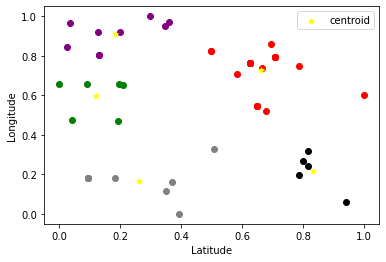

In [18]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
plt.scatter(df1.Latitude,df1['Longitude'],color='green')
plt.scatter(df2.Latitude,df2['Longitude'],color='red')
plt.scatter(df3.Latitude,df3['Longitude'],color='black')
plt.scatter(df4.Latitude,df4['Longitude'],color='purple')
plt.scatter(df5.Latitude,df5['Longitude'],color='grey')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='*',label='centroid')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()

# The silhouette measure for K-mean clusters

In [19]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['Longitude', 'Latitude']])
silhouette_avg = silhouette_score(df[['Longitude', 'Latitude']], kmeans.labels_)
silhouette_avg

0.5544370968823259